In [ ]:
# What is the probability that a customer who has taken home loan will be defaulting on next EMI payment.
# Accordingly take additional measures,either inform them or bank to plan their budget.

# Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV 
from urllib.request import urlopen 
import time

# Read the Data from the CSV file

In [2]:
bank_df = pd.read_csv('/Users/priyankac/Downloads/Machine Learning/bank.csv', na_values = ['NA'])
temp_bank_df = bank_df.head(10)
temp_bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
# Check the columns in the data set
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
# Check the number of rows and columns in the data set
bank_df.shape

(11162, 17)

In [10]:
# Using the info function to check the data
bank_df.info()

# There are 7 integer type columns and 8 object type columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# Zero Variance Check

In [5]:
# Check is any column has just one value throughout
zero_var = bank_df.nunique()
zero_var


age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [6]:
# Columns 'contact' and 'poutcome' are low variance columns and do not add any value to the prediction algorithm
# since the target variable 'deposit' is not affected by them

# Drop the columns 'contact' and 'poutcome'

bank_df.drop(columns = ['contact' , 'poutcome'] , inplace = True)
bank_df


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,no,733,no,no,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,no,29,no,no,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,no,0,no,yes,8,may,9,2,172,5,no


# Check for Outliers

In [7]:
# Descriptive statistics summary

bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<AxesSubplot:xlabel='balance'>

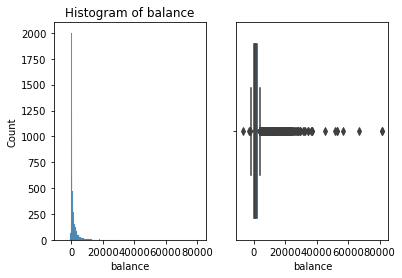

In [8]:
# Analysis for  column 'balance'
plt.subplot(1,2,1)
sns.histplot(bank_df['balance'] , kde = False).set_title('Histogram of balance')

# 5 point summary for column 'balance'
plt.subplot(1,2,2)
sns.boxplot(bank_df['balance'])



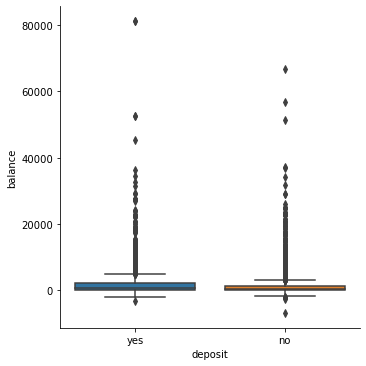

In [56]:
# anlysis of 'deposit' with regard to 'balance'
sns.catplot(x='deposit' ,y='balance', data= bank_df,kind = 'box')

<AxesSubplot:xlabel='day'>

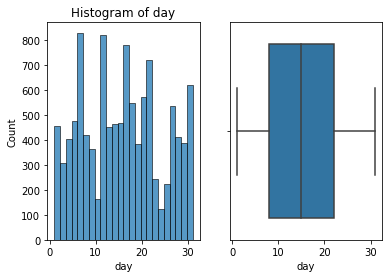

In [9]:
# Analysis for column 'day'
plt.subplot(1,2,1)
sns.histplot(bank_df['day'] , kde = False).set_title('Histogram of day')

# 5 point summary for column 'day'
plt.subplot(1,2,2)
sns.boxplot(bank_df['day'])



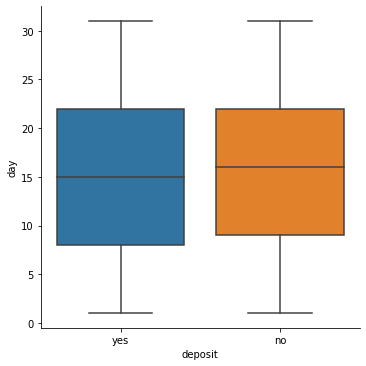

In [57]:
# anlysis of 'deposit' with regard to 'day'
sns.catplot(x='deposit' ,y='day', data= bank_df,kind = 'box')

<AxesSubplot:xlabel='duration'>

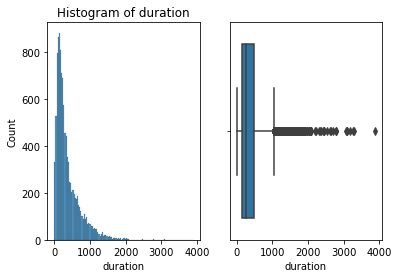

In [35]:
# Analysis for column 'duration'
plt.subplot(1,2,1)
sns.histplot(bank_df['duration'] , kde = False).set_title('Histogram of duration')

# 5 point summary for column 'duration'
plt.subplot(1,2,2)
sns.boxplot(bank_df['duration'])


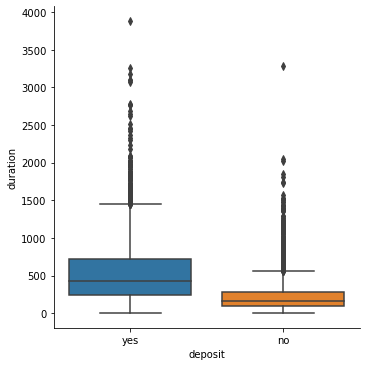

In [58]:
# anlysis of 'deposit' with regard to 'duration'
sns.catplot(x='deposit' ,y='duration', data= bank_df,kind = 'box')

<AxesSubplot:xlabel='campaign'>

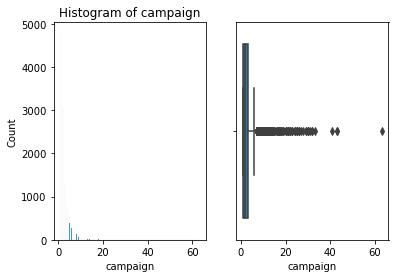

In [36]:
# Analysis for column 'campaign'
plt.subplot(1,2,1)
sns.histplot(bank_df['campaign'] , kde = False).set_title('Histogram of campaign')

# 5 point summary for column 'camapign'
plt.subplot(1,2,2)
sns.boxplot(bank_df['campaign'])


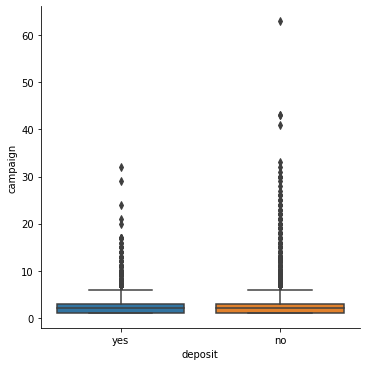

In [59]:
# anlysis of 'deposit' with regard to 'campaign'
sns.catplot(x='deposit' ,y='campaign', data= bank_df,kind = 'box')

<AxesSubplot:xlabel='pdays'>

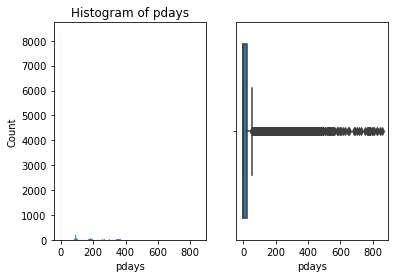

In [37]:
# Analysis for column 'pdays'
plt.subplot(1,2,1)
sns.histplot(bank_df['pdays'] , kde = False).set_title('Histogram of pdays')

# 5 point summary for column 'pdays'
plt.subplot(1,2,2)
sns.boxplot(bank_df['pdays'])


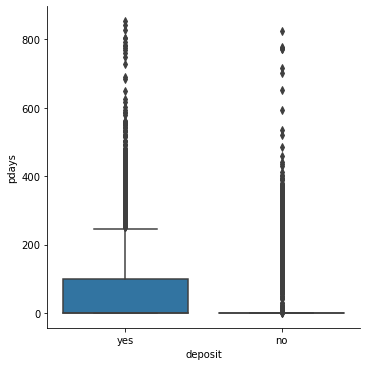

In [60]:
# anlysis of 'deposit' with regard to 'pdays'
sns.catplot(x='deposit' ,y='pdays', data= bank_df,kind = 'box')

<AxesSubplot:xlabel='previous'>

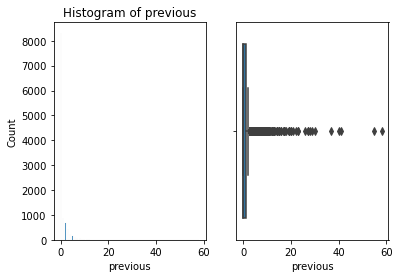

In [38]:
# Analysis for column 'previous'
plt.subplot(1,2,1)
sns.histplot(bank_df['previous'] , kde = False).set_title('Histogram of previous')

# 5 point summary for column 'previous'
plt.subplot(1,2,2)
sns.boxplot(bank_df['previous'])


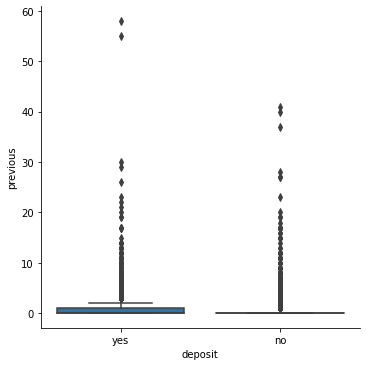

In [61]:
# anlysis of 'deposit' with regard to 'previous'
sns.catplot(x='deposit' ,y='previous', data= bank_df,kind = 'box')

In [ ]:
# Most of the variables exhibit skewness.
# Almost all variables except one are associated with outliers

# Scatter plot

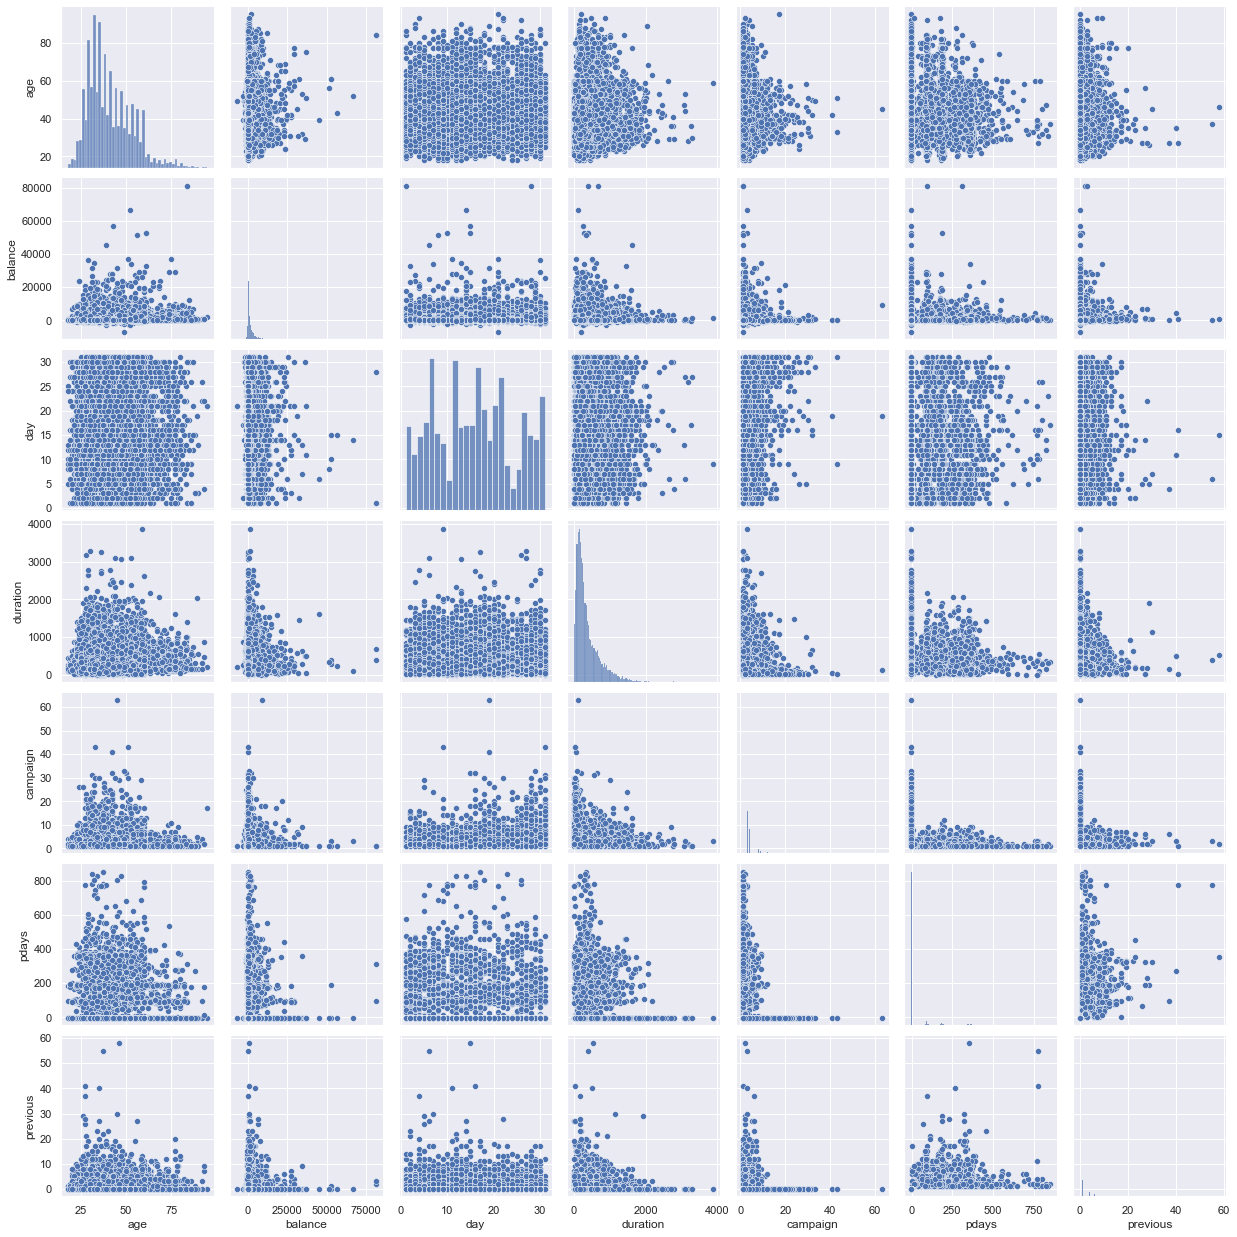

In [41]:
#scatterplot
sns.set()
cols = ['age','balance', 'day', 'duration','campaign','pdays', 'previous']
sns.pairplot(bank_df[cols], size = 2.5)
plt.show();

In [ ]:
# Scatter plot clearly indicates the presence of outliers

In [16]:
# Removing the outliers and selecting data only within the Inter Quartile range

# Select the data from 25th and 75th quartile
q1 = bank_df.quantile(0.25)
q3 = bank_df.quantile(0.75)
iqr = q3-q1
# filter out all rows

bank_new_df = bank_df[((bank_df >= q1) & (bank_df <= q3)).any(axis = 1)]
bank_new_df
bank_new_df.shape

(11154, 15)

# Check for duplicates

In [19]:
# calculate the duplicates
bank_df_dup = bank_new_df.duplicated()
bank_df_dup

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11154, dtype: bool

In [20]:
# Report if there are any duplicates
print(bank_df_dup.any())

# There are no duplicate rows present in the data set

False


# Correlation Check

In [21]:
# Correlation matrix (quantitative columns)
corr_matrix = bank_new_df.corr()
print(corr_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112578 -0.001906  0.000584 -0.005679  0.002111  0.019147
balance   0.112578  1.000000  0.010625  0.022044 -0.014152  0.016966  0.030464
day      -0.001906  0.010625  1.000000 -0.018079  0.136911 -0.077527 -0.059667
duration  0.000584  0.022044 -0.018079  1.000000 -0.041776 -0.027794 -0.027158
campaign -0.005679 -0.014152  0.136911 -0.041776  1.000000 -0.103650 -0.050809
pdays     0.002111  0.016966 -0.077527 -0.027794 -0.103650  1.000000  0.506887
previous  0.019147  0.030464 -0.059667 -0.027158 -0.050809  0.506887  1.000000


<AxesSubplot:>

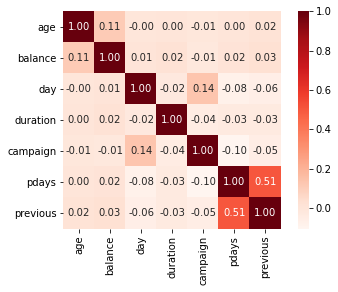

In [70]:
# Heatmap
#f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix, annot= True, square= True, cmap='Reds', fmt= '1.2f')

   

In [23]:
# Select the uppr triangle if the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)

          age   balance       day  duration  campaign     pdays  previous
age       NaN  0.112578 -0.001906  0.000584 -0.005679  0.002111  0.019147
balance   NaN       NaN  0.010625  0.022044 -0.014152  0.016966  0.030464
day       NaN       NaN       NaN -0.018079  0.136911 -0.077527 -0.059667
duration  NaN       NaN       NaN       NaN -0.041776 -0.027794 -0.027158
campaign  NaN       NaN       NaN       NaN       NaN -0.103650 -0.050809
pdays     NaN       NaN       NaN       NaN       NaN       NaN  0.506887
previous  NaN       NaN       NaN       NaN       NaN       NaN       NaN


In [24]:
# Find the features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(); print(to_drop)


[]


In [ ]:
# None of the variables show correlation greater than 0.75

# Missing Values

In [25]:
# Check for the null values(missing values)
total_data = bank_df.isnull().sum().sort_values(ascending=False)

# Calculate the percentage total missing
percent_missing = (bank_df.isnull().sum()/bank_df.isnull().count()).sort_values(ascending=False)

# Missing data
missing_data = pd.concat([total_data, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
deposit,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
day,0,0.0
loan,0,0.0
housing,0,0.0
balance,0,0.0


In [ ]:
# There are no missing values in the data set

# Data Pre Pocessing


In [27]:
contact_df = bank_new_df

In [28]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [29]:
encoded_df = preprocessor(contact_df)

x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values

# Split data inta Train and Test

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = .2)

# Build the Decision Tree Model

In [31]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)


Training score:  0.7183856502242153
Testing score:  0.7132451815329449


In [32]:
# Decision tree with depth = 5
model_dt_5 = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_split=100)
model_dt_5.fit(x_train, y_train)
model_dt_5_score_train = model_dt_5.score(x_train, y_train)
print("Training score: ",model_dt_5_score_train)
model_dt_5_score_test = model_dt_5.score(x_test, y_test)
print("Testing score: ",model_dt_5_score_test)


Training score:  0.8008968609865471
Testing score:  0.7663603765127746


In [33]:
# Decision tree with depth = 7
model_dt_7 = DecisionTreeClassifier(random_state=1, max_depth=7, min_samples_split=150,criterion = "gini")
model_dt_7.fit(x_train, y_train)
model_dt_7_score_train = model_dt_7.score(x_train, y_train)
print("Training score: ",model_dt_7_score_train)
model_dt_7_score_test = model_dt_7.score(x_test, y_test)
print("Testing score: ",model_dt_7_score_test)

Training score:  0.8139013452914798
Testing score:  0.7688256387270282


In [35]:
# Decision tree with depth = 9
model_dt_9 = DecisionTreeClassifier(random_state=1, max_depth=9, min_samples_leaf= 100 ,criterion = "gini")
model_dt_9.fit(x_train, y_train)
model_dt_9_score_train = model_dt_9.score(x_train, y_train)
print("Training score: ",model_dt_9_score_train)
model_dt_9_score_test = model_dt_9.score(x_test, y_test)
print("Testing score: ",model_dt_9_score_test)

Training score:  0.7847533632286996
Testing score:  0.7644554011653967


In [37]:
# Decision tree with depth = 6
model_dt_6 = DecisionTreeClassifier(random_state=1, max_depth=6,min_samples_split=10, criterion = "gini")
model_dt_6.fit(x_train, y_train)
model_dt_6_score_train = model_dt_6.score(x_train, y_train)
print("Training score: ",model_dt_6_score_train)
model_dt_6_score_test = model_dt_6.score(x_test, y_test)
print("Testing score: ",model_dt_6_score_test)

Training score:  0.8358744394618834
Testing score:  0.7869789332138055


In [52]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8,min_samples_leaf=2, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8762331838565023
Testing score:  0.7666965486329


In [39]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 6, criterion = 'gini')
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

# Performance Metrics

In [40]:
predictions = model_dt.predict(x_test)
predictions

array([0, 1, 0, ..., 0, 1, 0])

In [41]:
y_actual_result = ""
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

# Area Under Curve

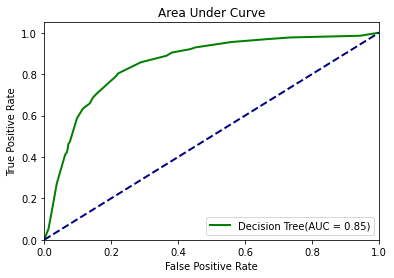

In [42]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Area Under Curve
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

In [43]:
print (confusion_matrix(y_test, predictions))

[[3678 1010]
 [ 883 3353]]


In [44]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

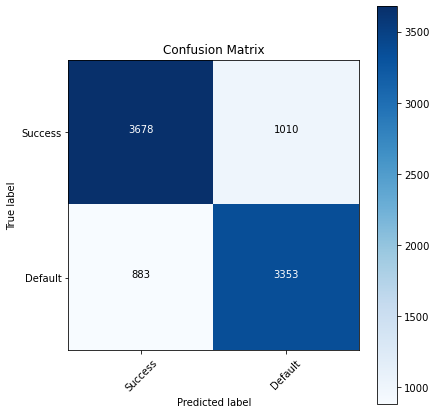

In [45]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Accuracy Score

In [46]:
accuracy_score(y_test, predictions)

0.7878753922008068

# Hyper-Parameter Optimization Using GridSearchCV

In [73]:
model_dt_1 = DecisionTreeClassifier()


In [91]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4,5,6,7,8],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_dt= GridSearchCV(model_dt_1, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_dt.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 5, 'max_features': None}
Time taken in grid search:  0.46
